# 💁 convert chkpoint to lora

In [1]:
import pandas as pd

import torch
import safetensors
from safetensors.torch            import load_file

from stable_diffusion import load_state_dict
from diffusers import (AutoencoderKL,    DDPMScheduler,    UNet2DConditionModel,    UniPCMultistepScheduler)
from transformers                 import CLIPTextModel, CLIPTextModelWithProjection, CLIPTokenizer, CLIPImageProcessor

xl_model_cfg = {
        'v1': '/home/dell/workspace/models/stable-diffusion-v1-5', # Use safety checker from v1
        'v1_lora': '/home/dell/workspace/models/v15landRealistic_lora.safetensors',
        'base': '/home/dell/workspace/models/stable-diffusion-xl-base-1.0',
        'refiner': '/home/dell/workspace/models/stable-diffusion-xl-refiner-1.0',
        "xl_shuimo": '/home/dell/workspace/models/shinyunbok_sdxlBeta',
        "xl_shuimo_lora": '/home/dell/workspace/models/shinyunbok_sdxlBeta_lora.safetensors',
        "xl_pix_lora" :  "/home/dell/workspace/models/pixel-art-xl.safetensors",
    
        "finalAnimeCG_mk2a2": '/home/dell/workspace/models/finalAnimeCG_mk2a2',
        "finalAnimeCG_mk2a2_lora": '/home/dell/workspace/models/finalAnimeCG_mk2a2_lora.safetensors',
        "leosamsPhotoHelloworldSDXL": '/home/dell/workspace/models/leosamsPhotoHelloworldSDXL',
        "leosamsPhotoHelloworldSDXL_lora": '/home/dell/workspace/models/leosamsPhotoHelloworldSDXL_lora.safetensors',
        "artVividXL_v2": '/home/dell/workspace/models/artVividXL_v2',
        "artVividXL_v2_lora": '/home/dell/workspace/models/artVividXL_v2_lora.safetensors',
        "nekorayAnimxl_v06W3": '/home/dell/workspace/models/nekorayAnimxl_v06W3',
        "nekorayAnimxl_v06W3_lora": '/home/dell/workspace/models/nekorayAnimxl_v06W3_lora.safetensors',
        "nightvisionXLPhotorealisticPortrait": '/home/dell/workspace/models/nightvisionXLPhotorealisticPortrait',
        "nightvisionXLPhotorealisticPortrait_lora": '/home/dell/workspace/models/nightvisionXLPhotorealisticPortrait_lora.safetensors'
    }

pix_xl_lora = load_state_dict(xl_model_cfg["xl_pix_lora"])
pix_xl_lora_df = pd.DataFrame(data = [(k, v.shape) for k, v in pix_xl_lora.items()], columns=["lora_key", "shape"])

xl_shuimo_lora = load_state_dict(xl_model_cfg["xl_shuimo_lora"])
xl_shuimo_lora_df = pd.DataFrame(data = [(k, v.shape) for k, v in xl_shuimo_lora.items()], columns=["lora_key", "shape"])

# v1lora = load_state_dict(xl_model_cfg["v1_lora"])
# v1lora_df = pd.DataFrame(data = [(k, v.shape) for k, v in v1lora.items()], columns=["lora_key", "shape"])

# xl_shuimo_lora_df["prefix"] = xl_shuimo_lora_df["lora_key"].apply(lambda x: x[:20])
# xl_lora_df = pd.merge(xl_shuimo_lora_df, pix_xl_lora_df, on=["lora_key"], how="outer")
# lora_df1 = pd.merge(v1lora_df, pix_xl_lora_df, on=["lora_key"], how="outer")

print(">> pix_xl_lora_df shape", pix_xl_lora_df.shape, "xl_shuimo_lora_df shape", xl_shuimo_lora_df.shape)

ModuleNotFoundError: No module named 'diffusers'

In [4]:
# -- 查看 前缀，是什么key作为lora的 
# xl_shuimo_lora_df.groupby(by = ["prefix"], as_index=False).count()
# lora_df1

# 👀 1 载入 SD XL pipeLine

In [5]:
#  ---- 尝试load lora ，通过新的方式载入lora ------
from diffusers import StableDiffusionXLPipeline
import torch

# model_path = "sdxl-lora/checkpoint-1000"  # 根据自己设置的训练策略找到保存权重的checkpoint文件夹
model_path = "/home/dell/workspace/models/pixel-art-xl.safetensors"
pipexl = StableDiffusionXLPipeline.from_pretrained(xl_model_cfg["base"], torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipexl.vae.enable_tiling()
pipexl.vae.enable_slicing()

# pipexl = pipexl.to("cuda")
# pipe.load_lora_weights(model_path)

prompt = "A moose in watercolor painting style"  # 生成内容
# image = pipexl(prompt, num_inference_steps=20, guidance_scale=7.5, height=768, width=768).images[0]
# image.save("moose.png")  # 保存图像名
# image.resize(size=(512, 512))

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:

pipexl = pipexl.to(torch_dtype=torch.float32)

In [235]:
xl_unet_keys_df.to_csv("xl_base_unet_sd_keys.csv", index=False)

In [234]:
# xl_unet_keys_ = pipexl.unet.state_dict().keys()
# xl_unet_keys_df = pd.DataFrame(xl_unet_keys_, columns=["keys"])
# xl_unet_keys_df.head()


# import torch
# import torch.nn as nn

# # 定义一个示例模型
# class MyModel(nn.Module):
#     def __init__(self):
#         super(MyModel, self).__init__()
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
#         self.conv2 = nn.Conv2d(64, 128, kernel_size=3)
#         self.fc = nn.Linear(128, 10)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc(x)
#         return x

# # 创建模型实例
# model = MyModel()

# # 遍历模型及其子模块的迭代器
# for name, module in model.named_modules():
#     # 打印模块名称
#     print("Module name:", name)

#     # 获取模块的参数字典
#     state_dict = module.state_dict()

#     # 打印参数字典的键
#     print("State dict keys:")
#     for key in state_dict.keys():
#         print(key)

#     print("--------")

Module name: 
State dict keys:
conv1.weight
conv1.bias
conv2.weight
conv2.bias
fc.weight
fc.bias
--------
Module name: conv1
State dict keys:
weight
bias
--------
Module name: conv2
State dict keys:
weight
bias
--------
Module name: fc
State dict keys:
weight
bias
--------


# 👑 2 载入lora  多种方式~
- mixin 方式，无法卸载，会导致unte模型 不可重用~

In [154]:
# -- bac  state_dict of unet and text_encoder~
import copy
from stable_diffusion_xl import lora_mix as xl_lora_mix
st_unet = copy.deepcopy(pipexl.unet.state_dict())
st_encoder = copy.deepcopy(pipexl.text_encoder.state_dict())

Load state dict from /home/dell/workspace/models/shinyunbok_sdxlBeta_lora.safetensors


  0%|          | 0/20 [00:00<?, ?it/s]

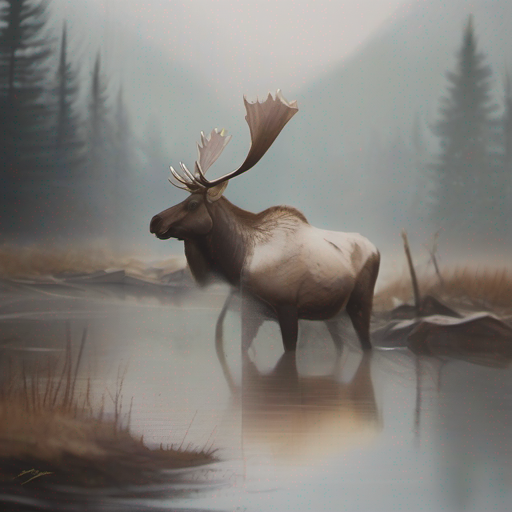

In [217]:
# pipexl.load_lora_weights(db_lora)   #  -- not working , theloaded lora had some key not match~
traget_list = [
                "xl_shuimo",
                "finalAnimeCG_mk2a2", 
                "leosamsPhotoHelloworldSDXL", 
                "artVividXL_v2",
                "nekorayAnimxl_v06W3",
                "nightvisionXLPhotorealisticPortrait"
            ]

ratio = 1.0
dtype = torch.float16    
# generator = torch.manual_seed(1024)
generator = torch.Generator(device="cuda").manual_seed(1024)

# for target in traget_list
target = traget_list[0]

prompt = "A moose in watercolor painting style"
# prompt = "1 girl "
neg_p = "noise, low contrast, blurry"
db_lora = target + "_lora"
lora_sd = load_state_dict(xl_model_cfg[db_lora]) # xl_pix_lora
pipexl.unet.load_state_dict(st_unet, strict=False)
pipexl.text_encoder.load_state_dict(st_encoder, strict=False)
# image = pipexl(prompt, neg_p, num_inference_steps=20, guidance_scale=7.5, height=768, width=768).images[0]
image = pipexl(prompt, neg_p, num_inference_steps=20, guidance_scale=7.5, height=768, width=768, generator=generator).images[0]
# image.save(f"{target}_no.png")
image.resize(size=(512, 512))

## 👀 通过原生方式运行
- 相当于整个checkpoint 不经济~，不推荐

In [218]:
target = traget_list[3]
print(" >> target", target)
unet_base_db = UNet2DConditionModel.from_pretrained(
        xl_model_cfg[target],    subfolder='unet', 
        torch_dtype = dtype,    use_safetensors=True,    variant='fp16'  ).to(pipexl.device)
encoder_db = CLIPTextModel.from_pretrained(
    xl_model_cfg[target],    subfolder='text_encoder',
    torch_dtype=dtype,    use_safetensors=True,    variant='fp16' ).to(pipexl.device)
generator = torch.Generator(device="cuda").manual_seed(1024)
pipexl.unet = unet_base_db
pipexl.text_encoder = encoder_db


 >> target artVividXL_v2


 >> target artVividXL_v2


  0%|          | 0/20 [00:00<?, ?it/s]

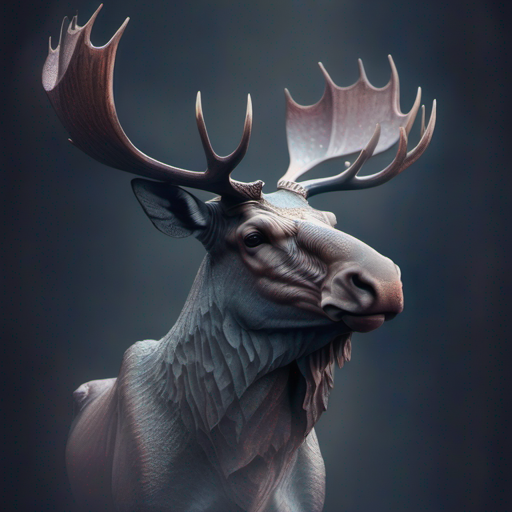

In [219]:
print(" >> target", target)
generator = torch.Generator(device="cuda").manual_seed(1024)
image = pipexl(prompt, neg_p, num_inference_steps=20, guidance_scale=7.5, height=768, width=768, generator=generator).images[0]
# image = pipexl(prompt, neg_p, num_inference_steps=20, guidance_scale=7.5, height=768, width=768).images[0]
# image.save(f"{target}_lora.png")
image.resize(size=(512, 512))

## ✍️ 通过 mix方式运行

In [269]:
lora_sd = load_state_dict(xl_model_cfg["artVividXL_v2_lora"]) # xl_pix_lora   artVividXL_v2_lora

unet_sd = pipexl.unet.state_dict()
encoder_sd = pipexl.text_encoder.state_dict()

after_unet, record_unet = xl_lora_mix(unet_sd, lora_sd, 'lora_unet_', ratio, pipexl.device, dtype)
after_encoder, record_encoder = xl_lora_mix(encoder_sd, lora_sd, 'lora_te_', ratio, pipexl.device, dtype)

pipexl.unet.load_state_dict(after_unet, strict=False)
pipexl.text_encoder.load_state_dict(after_encoder, strict=False)
after_unet == unet_sd

Load state dict from /home/dell/workspace/models/artVividXL_v2_lora.safetensors


True

In [7]:

hf=                     "down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.weight"
extract_lora= "lora_unet_down_blocks_1_attentions_0_transformer_blocks_0_attn1_to_k.lora_down.weight"

def match_lora_dict_extract(key, prefix):
    lora_key = key.replace(".weight", "")
    return prefix + lora_key

lora_prefix = "lora_unet_"
ratio=1.0
unet_sd = pipexl.unet.state_dict()
lora_sd = load_state_dict(xl_model_cfg["artVividXL_v2_lora"]) # xl_pix_lora
dtype=torch.float16
def mix_extract_xl_lora(base_sd, lora_sd, lora_prefix, ratio, device='cpu', dtype=torch.float32):
    record_replace={}
    for key, weight in base_sd.items():
        lora_key = match_lora_dict_extract(key, lora_prefix)
        # if key != "down_blocks.1.attentions.0.transformer_blocks.0.attn1.to_k.weight":
        #     continue
        if lora_key and (lora_key + '.down.weight') in lora_sd:
            assert (lora_key + '.up.weight') in lora_sd
    
            down_weight = lora_sd.pop(lora_key + '.down.weight').to(device, dtype=dtype)
            up_weight = lora_sd.pop(lora_key + '.up.weight').to(device, dtype=dtype)
    
            if len(weight.size()) == 2:
                # linear
                delta = up_weight @ down_weight
            else:
                delta = merge_conv(down_weight, up_weight)
            
            record_replace[key] = weight
            weight = (weight.to(device, dtype=dtype) + ratio * delta).to('cpu', dtype=dtype)
            del down_weight, up_weight, delta
            base_sd[key] = weight
    
    return base_sd, record_replace

after_unet, record_unet = mix_extract_xl_lora(unet_sd, lora_sd, 'lora_unet_', ratio, pipexl.device, dtype)
pipexl.unet.load_state_dict(after_unet, strict=False)

Load state dict from /home/dell/workspace/models/artVividXL_v2_lora.safetensors


<All keys matched successfully>

In [8]:
prompt = "a cute happy corgi"
neg_p = "bad"
pipexl = pipexl.to(torch_dtype=torch.float32)

  0%|          | 0/12 [00:00<?, ?it/s]

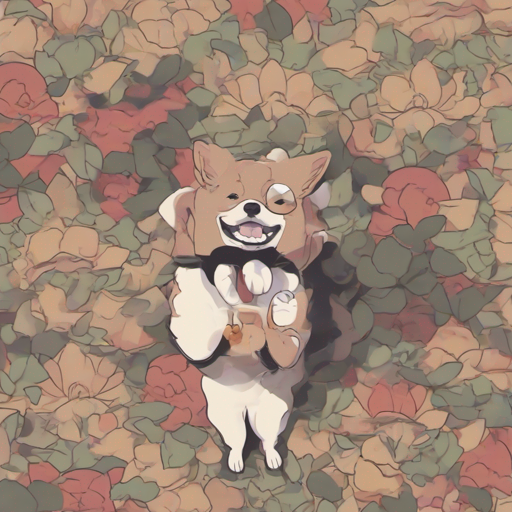

In [9]:
# generator = torch.Generator(device="cuda").manual_seed(1024)

image = pipexl(prompt, neg_p, num_inference_steps=12, guidance_scale=7.5, height=1024, width=1024).images[0]
# image = pipexl(prompt, neg_p, num_inference_steps=20, guidance_scale=7.5, height=768, width=768, generator=generator).images[0]
# image.save(f"{target}_lora.png")
image.resize(size=(512, 512))

In [1]:
1

1

In [132]:
unet_base_db = UNet2DConditionModel.from_pretrained(
        xl_model_cfg[target],    subfolder='unet', 
        torch_dtype = dtype,    use_safetensors=True,    variant='fp16'  ).to(pipexl.device)
encoder_db = CLIPTextModel.from_pretrained(
    xl_model_cfg[target],    subfolder='text_encoder',
    torch_dtype=dtype,    use_safetensors=True,    variant='fp16' ).to(pipexl.device)
# generator = torch.Generator(device="cuda").manual_seed(1024)
pipexl.unet = unet_base_db
pipexl.text_encoder = encoder_db

  0%|          | 0/20 [00:00<?, ?it/s]

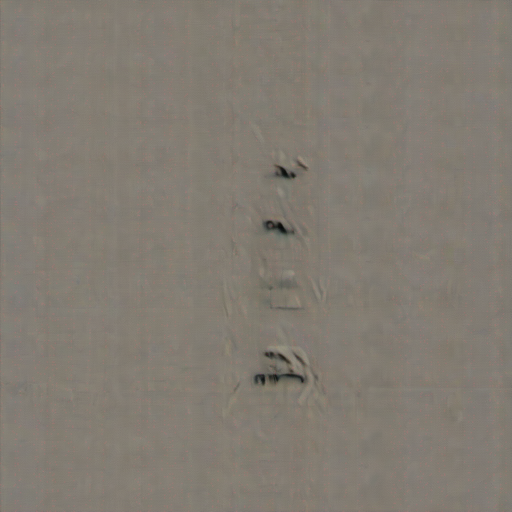

In [135]:
prompt = "leogirl, cute 1girl, messy hair, long black hair, lip biting, seductive leaning forward detailed skin, detailed face cleavage, realistic, photorealistic studio light Artgerm, evil smile"

# image = pipexl(prompt, neg_p, num_inference_steps=20, guidance_scale=7.5, height=768, width=768).images[0]
image = pipexl(prompt, neg_p, num_inference_steps=20, guidance_scale=7.5, height=768, width=768, generator=generator).images[0]
# image.save(f"{target}_lora.png")
image.resize(size=(512, 512))

In [148]:
model_path = "../models/v15landRealistic_lora.safetensors"
v15_sd = load_state_dict(model_path)
# list(v15_sd.keys())

Load state dict from ../models/v15landRealistic_lora.safetensors


In [11]:
# pipexl.unload_lora_weights()
# pipexl.load_lora_weights(model_path)
# pipexl.save_lora_weights("/home/dell/workspace/models/sub_pix_xl_lora")

## 👏 2.3  hugface pipeline 加载
- 意味着提取的lora必须转换为 hf格式~  加载时候指定系数
- 加载现成的lora似乎没有问题，支持加载，卸载

In [245]:
for i in list(lora_sd.keys()):
    if "time" in i:
        print(i)

  0%|          | 0/20 [00:00<?, ?it/s]

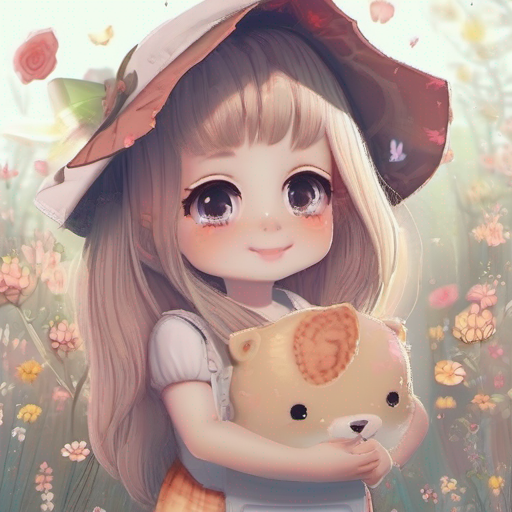

In [15]:
# pipexl.unload_lora_weights()
pipexl.unet.load_state_dict(st_unet, strict=False)
image = pipexl(prompt, num_inference_steps=20, guidance_scale=7.5, height=768, width=768, seed).images[0]
image.resize(size=(512, 512))

##  🤖 2.2  convert xl——Lora safetensor to diffusers
- 1、 build a stablediffusionXLpipeline
- 2、 load lora state_dict of safetensors
- 3、 foreach state_dict get current layer is unet or  textencoder
- 4、       while 找到目标层~
- 5、       处理lora_down, 以及成对的lora_up
-           weiGht_up  weight_down
-           cur_layer.weight.data += alpha * torch.mm(weight_up, weight_down)

In [26]:
# -- 1
# lora_sd = load_state_dict(db_lora)
# -- 2
curr_layer = pipe.unet
LORA_PREFIX_UNET = "lora_unet"
LORA_PREFIX_TEXT_ENCODER = "lora_te"
visited = []
for key in lora_sd:
    if ".alpha" in key or key in visited:
        continue

    if "text" in key:
        layer_infos = key.split(".")[0].split(LORA_PREFIX_TEXT_ENCODER + "_")[-1].split("_")
        curr_layer = pipe.text_encoder
    else:
        layer_infos = key.split(".")[0].split(LORA_PREFIX_UNET + "_")[-1].split("_")
        curr_layer = pipe.unet

    layer_infos = key.split(".")[0].split(LORA_PREFIX_UNET + "_")[-1].split("_")
    temp_name = layer_infos.pop(0)
    print(temp_name, key)
    while len(layer_infos) > -1:
        try:
            curr_layer = curr_layer.__getattr__(temp_name)
            if len(layer_infos) > 0:
                temp_name = layer_infos.pop(0)
            elif len(layer_infos) == 0:
                break
        except Exception:
            if len(temp_name) > 0:
                temp_name += "_" + layer_infos.pop(0)
            else:
                temp_name = layer_infos.pop(0)
                
    pair_keys = []
    if "lora_down" in key:
        pair_keys.append(key.replace("lora_down", "lora_up"))
        pair_keys.append(key)
    else:
        pair_keys.append(key)
        pair_keys.append(key.replace("lora_up", "lora_down"))

    # update weight
    if len(state_dict[pair_keys[0]].shape) == 4:
        weight_up = state_dict[pair_keys[0]].squeeze(3).squeeze(2).to(torch.float32)
        weight_down = state_dict[pair_keys[1]].squeeze(3).squeeze(2).to(torch.float32)
        curr_layer.weight.data += alpha * torch.mm(weight_up, weight_down).unsqueeze(2).unsqueeze(3)
    else:
        weight_up = state_dict[pair_keys[0]].to(torch.float32)
        weight_down = state_dict[pair_keys[1]].to(torch.float32)
        curr_layer.weight.data += alpha * torch.mm(weight_up, weight_down)

    # update visited list
    for item in pair_keys:
        visited.append(item)


lora lora_te_text_model_encoder_layers_0_mlp_fc1.lora_down.weight


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:24                                                                                   │
│                                                                                                  │
│   21 │   print(temp_name, key)                                                                   │
│   22 │   while len(layer_infos) > -1:                                                            │
│   23 │   │   try:                                                                                │
│ ❱ 24 │   │   │   curr_layer = curr_layer.__getattr__(temp_name)                                  │
│   25 │   │   │   if len(layer_infos) > 0:                                                        │
│   26 │   │   │   │   temp_name = layer_infos.pop(0)                                              │
│   27 │   │   │   elif len(layer_infos) == 0:                                                     │
│                                                                                                  │
│ /home/dell/.conda/envs/sd/lib/python3.8/site-packages/torch/nn/modules/module.py:1614 in         │
│ __getattr__                                                                                      │
│                                                                                                  │
│   1611 │   │   │   modules = self.__dict__['_modules']                                           │
│   1612 │   │   │   if name in modules:                                                           │
│   1613 │   │   │   │   return modules[name]                                                      │
│ ❱ 1614 │   │   raise AttributeError("'{}' object has no attribute '{}'".format(                  │
│   1615 │   │   │   type(self).__name__, name))                                                   │
│   1616 │                                                                                         │
│   1617 │   def __setattr__(self, name: str, value: Union[Tensor, 'Module']) -> None:             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'CLIPTextModel' object has no attribute 'lora_te_text_model_encoder_layers_0_mlp_fc1'

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:31                                                                                   │
│                                                                                                  │
│   28 │   │   │   │   break                                                                       │
│   29 │   │   except Exception:                                                                   │
│   30 │   │   │   if len(temp_name) > 0:                                                          │
│ ❱ 31 │   │   │   │   temp_name += "_" + layer_infos.pop(0)                                       │
│   32 │   │   │   else:                                                                           │
│   33 │   │   │   │   temp_name = layer_infos.pop(0)                                              │
│   34                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: pop from empty list

In [ ]:
curr_layer.__getattr__("lora_te_text_model_encoder_layers_0_mlp_fc1")

In [ ]:
state_dict, network_alphas = pipe.lora_state_dict(
            # pretrained_model_name_or_path_or_dict,
            model_path,
            unet_config=pipe.unet.config,
            # **kwargs,
)

sdxl_st = state_dict.keys()
sdxl_df = pd.DataFrame(data = sdxl_st, columns=["xl_lora_key"])

print(len(sdxl_st))

network_alphas_df = network_alphas

In [ ]:
network_alphas_df = pd.DataFrame(data = [[k, v]  for k,v in network_alphas.items()], columns=["alpha_key", "dim"])
network_alphas_df


# 👑 三 提取lora 

In [1]:
# - - 进入 lycios 对应的tool 目录才能import正确

import os, sys
sys.path.insert(0, os.getcwd())
import argparse


from lycoris.utils import extract_diff

import torch
from safetensors.torch import save_file



[2023-08-31 12:09:58,089] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


2023-08-31 12:10:11.050975: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-31 12:10:11.793207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 12:10:15.805964: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import argparse

args = argparse.Namespace()

args.base_model = xl_model_cfg['base']
args.db_model = '/home/dell/workspace/models/shinyunbok_sdxlBeta.safetensors'  # a chkpoint use use SDXL 
args.output_name = '/home/dell/workspace/models/shinyunbok_sdxlBeta_lora.safetensors'
args.is_v2 = False
args.device = 'cuda'
args.mode = 'fixed'
args.safetensors = True
args.linear_dim = 64   # 128
args.conv_dim = 64     # 128
args.linear_threshold = 0.0
args.conv_threshold = 0.0
args.linear_ratio = 0.0
args.conv_ratio = 0.0
args.linear_quantile = 1.0
args.conv_quantile = 1.0
args.use_sparse_bias = False
args.sparsity = 0.98
args.disable_cp = False
args

Namespace(base_model='/home/dell/workspace/models/stable-diffusion-xl-base-1.0/unet/diffusion_pytorch_model.fp16.safetensors', conv_dim=64, conv_quantile=1.0, conv_ratio=0.0, conv_threshold=0.0, db_model='/home/dell/workspace/models/shinyunbok_sdxlBeta.safetensors', device='cuda', disable_cp=False, is_v2=False, linear_dim=64, linear_quantile=1.0, linear_ratio=0.0, linear_threshold=0.0, mode='fixed', output_name='/home/dell/workspace/models/shinyunbok_sdxlBeta_lora.safetensors', safetensors=True, sparsity=0.98, use_sparse_bias=False)

In [3]:
!pwd

/home/dell/workspace/LyCORIS


In [51]:
#  --- - - -diffusers --  - - -- 
from transformers                 import CLIPTextModel, CLIPTextModelWithProjection, CLIPTokenizer, CLIPImageProcessor
from stable_diffusion import UNetWrapper, TextEncoderWrapper
from diffusers import (AutoencoderKL,    DDPMScheduler,    UNet2DConditionModel,    UniPCMultistepScheduler)

dtype = torch.float32
device = "cuda"

unet_base_db = UNet2DConditionModel.from_pretrained(
    xl_model_cfg['base_db'],    subfolder='unet', 
    torch_dtype = dtype,    use_safetensors=True,    variant='fp16'  )
text_encoder_base_db = CLIPTextModel.from_pretrained(
    xl_model_cfg['base_db'],    subfolder='text_encoder',
    torch_dtype=dtype,    use_safetensors=True,    variant='fp16' )

unet_base = UNet2DConditionModel.from_pretrained(
    xl_model_cfg['base'],    subfolder='unet', 
    torch_dtype = dtype,    use_safetensors=True,    variant='fp16'  )

text_encoder_base = CLIPTextModel.from_pretrained(
    xl_model_cfg['base'],    subfolder='text_encoder',
    torch_dtype=dtype,    use_safetensors=True,    variant='fp16' )

In [52]:
# -- 从一个checkpoint 提取 并将diff 部分转换为 另一个checkpoint + lora的形式表示， 秩 可以自由指定
# -- 
# base = [text_encoder_v1, None, unet_v1]
# db = [text_encoder_v1db, None, unet_v1_db]
base = [text_encoder_base, None, unet_base]
db = [text_encoder_base_db, None, unet_base_db]

linear_mode_param = {
    'fixed': args.linear_dim,
    'threshold': args.linear_threshold,
    'ratio': args.linear_ratio,
    'quantile': args.linear_quantile,
}[args.mode]
conv_mode_param = {
    'fixed': args.conv_dim,
    'threshold': args.conv_threshold,
    'ratio': args.conv_ratio,
    'quantile': args.conv_quantile,
}[args.mode]

state_dict_ = extract_diff(
    base, db,
    args.mode,
    linear_mode_param, conv_mode_param,
    args.device, 
    args.use_sparse_bias, args.sparsity,
    not args.disable_cp
)
save_file(state_dict, "/home/dell/workspace/models/shinyunbok_sdxlBeta_lora.safetensors")


100%|██████████| 1930/1930 [05:27<00:00,  5.89it/s]

0 1691


## 😂 v15 加载  lora 测试~

In [5]:
# from sd_scripts.networks.lora import create_network_from_weights, LoRAModule, LoRAInfModule, parse_block_lr_kwargs,LoRANetwork
from safetensors.torch import load_file

from diffusers import StableDiffusionPipeline

import torch

model_path = "../models/v15landRealistic_lora.safetensors"
pipev1 = StableDiffusionPipeline.from_pretrained("../models/stable-diffusion-v1-5/", torch_dtype=torch.float16)
# pipe.unet.load_attn_procs(model_path)   ##-------- Load LORA  !!!!!!
# pipe.save_pretrained("models/CompVis_sd_v14")
pipev1.to("cuda")
prompt = "a iland in moonlight"


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/dell/.conda/envs/sd/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'TokenizerWrapper'. 
The class this function is called from is 'CLIPTokenizer'.


In [13]:
# pipe.unet.load_attn_procs(model_path)   ##-------- Load LORA  !!!!!!
lora_converted = "/home/dell/workspace/models/09280dd431515a83457b6bbbd81c56d8/model.fp16.safetensors"
prompt = "1 girl cute"
# pipe.unet.load_state_dict(unet_sd, strict=False)
pipexl.unet.load_attn_procs(lora_converted)
# pipe.text_encoder.load_state_dict(text_encoder_sd, strict=False)
# pipe.load_lora_weights(lora_converted)  # error -- bad 
neg = "blurry, bad resolution, 1080p, awkward, distorted, not realistic, weird, not matching prompts bad color, weird color spots, distorted color, weird color, blended color, gigantic moon, bad tree, deformed objects"
image = pipexl(prompt,negative_prompt=neg, num_inference_steps=30, guidance_scale=7.5).images[0]
image

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 lora_converted = "/home/dell/workspace/models/09280dd431515a83457b6bbbd81c56d8/model.fp1    │
│    3 prompt = "1 girl cute"                                                                      │
│    4 # pipe.unet.load_state_dict(unet_sd, strict=False)                                          │
│ ❱  5 pipexl.unet.load_attn_procs(lora_converted)                                                 │
│    6 # pipe.text_encoder.load_state_dict(text_encoder_sd, strict=False)                          │
│    7 # pipe.load_lora_weights(lora_converted)  # error -- bad                                    │
│    8 neg = "blurry, bad resolution, 1080p, awkward, distorted, not realistic, weird, not matc    │
│                                                                                                  │
│ /home/dell/.conda/envs/sd/lib/python3.8/site-packages/diffusers/loaders.py:366 in                │
│ load_attn_procs                                                                                  │
│                                                                                                  │
│    363 │   │   │   for key, value_dict in lora_grouped_dict.items():                             │
│    364 │   │   │   │   attn_processor = self                                                     │
│    365 │   │   │   │   for sub_key in key.split("."):                                            │
│ ❱  366 │   │   │   │   │   attn_processor = getattr(attn_processor, sub_key)                     │
│    367 │   │   │   │                                                                             │
│    368 │   │   │   │   # Process non-attention layers, which don't have to_{k,v,q,out_proj}_lor  │
│    369 │   │   │   │   # or add_{k,v,q,out_proj}_proj_lora layers.                               │
│                                                                                                  │
│ /home/dell/.conda/envs/sd/lib/python3.8/site-packages/diffusers/models/modeling_utils.py:185 in  │
│ __getattr__                                                                                      │
│                                                                                                  │
│   182 │   │   │   return self._internal_dict[name]                                               │
│   183 │   │                                                                                      │
│   184 │   │   # call PyTorch's https://pytorch.org/docs/stable/_modules/torch/nn/modules/modul   │
│ ❱ 185 │   │   return super().__getattr__(name)                                                   │
│   186 │                                                                                          │
│   187 │   @property                                                                              │
│   188 │   def is_gradient_checkpointing(self) -> bool:                                           │
│                                                                                                  │
│ /home/dell/.conda/envs/sd/lib/python3.8/site-packages/torch/nn/modules/module.py:1614 in         │
│ __getattr__                                                                                      │
│                                                                                                  │
│   1611 │   │   │   modules = self.__dict__['_modules']                                           │
│   1612 │   │   │   if name in modules:                                                           │
│   1613 │   │   │   │   return modules[name]                                                      │
│ ❱ 1614 │   │   raise AttributeError("'{}' object has no att

# ✍️✍️ 转换checkpoint to HF 
- 使用diffuser 中的转换工具 加载pipeline 

In [ ]:
# -- test to load v1.5 lora ---
from lycoris.kohya.model_utils import load_models_from_stable_diffusion_checkpoint, load_checkpoint_with_text_encoder_conversion
mode_id = "/home/dell/workspace/js-sd-svc/models/v1-5-pruned.safetensors"

device = "cpu"

# -- 载入三元组 ~  text_model, vae,  unet
# v15 = load_models_from_stable_diffusion_checkpoint(args.is_v2, mode_id)  
_, state_dict = load_checkpoint_with_text_encoder_conversion(mode_id, device)  #在载入混合state_dict 然后从每个独立的部分载入unet vae
unet = UNet2DConditionModel(**p).to(device)
info = unet.load_state_dict(converted_unet_checkpoint)

# # -- - -  直接使用diffuser版本的 载入 VAE uent, text_encoder一步加载岂不是更加完美？~~~~~~

# - 只需要对tex_encoder 以及 unet做lora提取操作
# state_dict = extract_diff(
#     base, db,
#     args.mode,        # -----------
#     linear_mode_param, conv_mode_param,
#     args.device, 
#     args.use_sparse_bias, args.sparsity,
#     not args.disable_cp
# )
